# Pymaceuticals Inc.
---

### Analysis

Based on the  results of the data, we can conclude that some drug regimens work better than others in reducing tumor volume and we can observe the effectiveness of specific drugs over timepoints. 

I made box plots for the drug regimens in order to determine which regimens resulted in smaller final tumor volumes. Based on these plots, both Capomulin and Ramicane showed the lowest final tumor volumes. I chose to track the tumor volume for a specific mouse treated with Capomulin and created a line plot in order to visualize the tumor volume changes for that mouse. The line plot shows that as the timepoints progress and the mouse is treated with Capomulin, the size of the tumors decreased. 
The data also gave the result that there is a correlation between the mouse weight and average tumor volume of a mouse. In order to determine this, I made a scatter plot of the Mouse weight versus the average tumor volume. Then, I plotted a line of regression on the scatter plot in order to show that there is a strong correlation between the weight of a mouse and their tumor volumes.

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice.
len(df["Mouse ID"].unique())

249

In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#df.drop_duplicates()
df[df.duplicated("Mouse ID")] 
#df[df.duplicated()]["Mouse ID"]
#df["Mouse ID" == "g989"]
df.loc[df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = df[df.duplicated(["Mouse ID", "Timepoint"], keep = False)]
duplicated.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_id = df[df["Mouse ID"] == str(duplicated.iloc[0,0])].index
clean_data = df.drop(duplicate_id)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimenMean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimenMean
regimenMedian = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

regimenVariance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

regimenStDev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

regimenStdErr = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summaryStats = pd.DataFrame({"Mean Tumor Volume": regimenMean, "Median Tumor Volume": regimenMedian, "Tumor Volume Variance": regimenVariance, "Tumor Volume Std. Dev":regimenStDev, "Tumor Volume Std. Err.": regimenStdErr})
summaryStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summaryStatistics = clean_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"].rename(columns = {"mean": "Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev", "sem":"Tumor Volume Std. Err."})
summaryStatistics

/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_78766/4166257504.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summaryStatistics = clean_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"].rename(columns = {"mean": "Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev", "sem":"Tumor Volume Std. Err."})


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

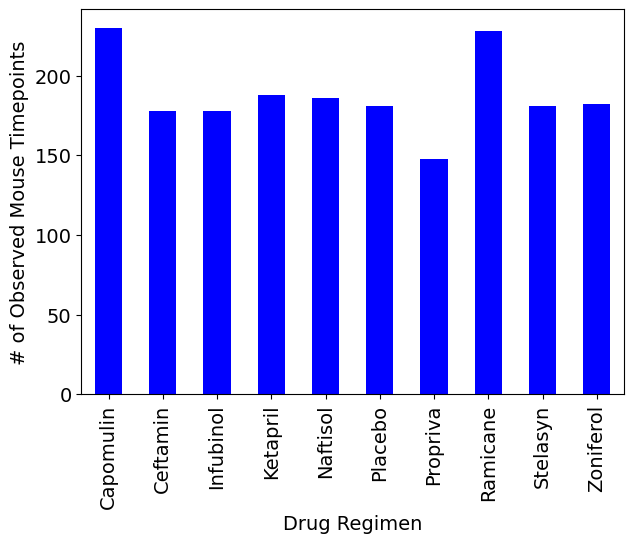

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepointsPerDrug = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"]
pandas_plot = timepointsPerDrug.plot(kind="bar", color='b', figsize=(7,5), fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("# of Observed Mouse Timepoints", fontsize = 14)

plt.show()


Text(0, 0.5, '# of Observed Mouse Timepoints')

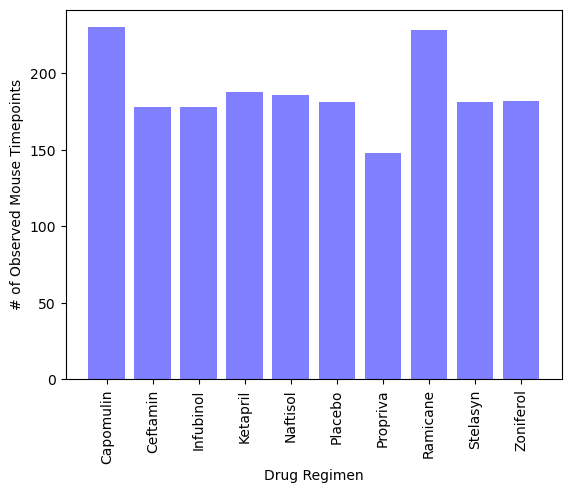

In [107]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(timepointsPerDrug))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepointsPerDrug.index, rotation = "vertical")
plt.bar(x_axis, timepointsPerDrug, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


#pyplot = timepointsPerDrug

Text(0, 0.5, 'Sex')

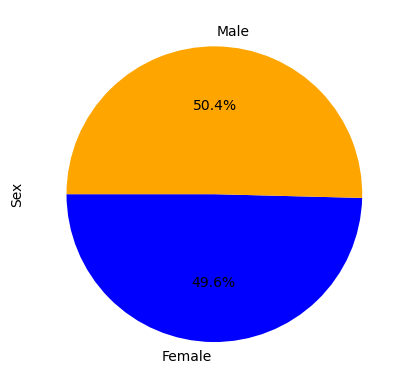

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_data.groupby("Sex")[["Mouse ID"]].nunique()
mouse_sex_plot = mouse_sex.plot(kind = "pie", autopct='%1.1f%%',legend=False,colors=["b","orange"], subplots = True, startangle = 180)
plt.ylabel("Sex")


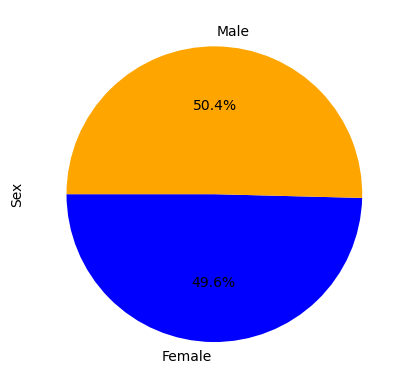

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig1, ax1 = plt.subplots()
ax1.pie(mouse_sex["Mouse ID"], labels=mouse_sex.index, autopct='%1.1f%%',colors=["blue", "orange"], startangle = 180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorVolumeMerged = last_timepoint.merge(clean_data, on = ["Mouse ID", "Timepoint"], how = "left")


In [147]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
totalTumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = tumorVolumeMerged.loc[tumorVolumeMerged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    totalTumor.append(tumorVol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVol.quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper - lower
    
    lb = lower - (1.5*iqr)
    ub = upper + (1.5*iqr)
    outliers = tumorVol.loc[(tumorVol < lb) | (tumorVol > ub)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_78766/2569069079.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


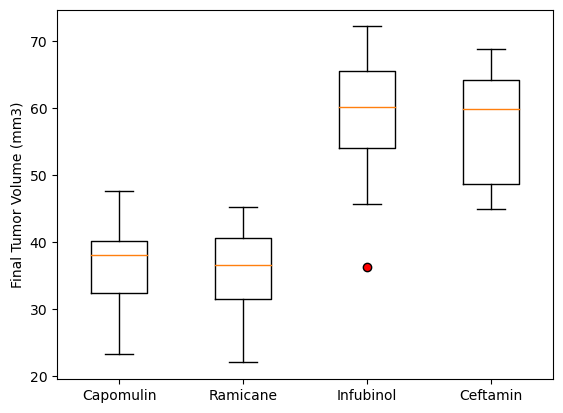

In [148]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatments)

outlier = dict(markerfacecolor='red')
bp = ax1.boxplot(totalTumor, flierprops=outlier)


## Line and Scatter Plots

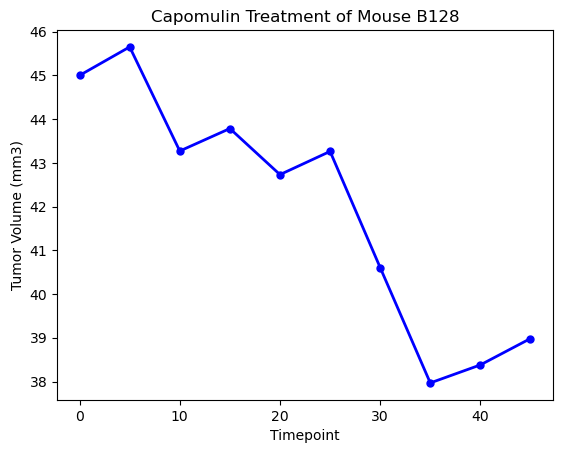

In [189]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Find the data for Capomulin mouse B128
capomulins = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin",:]
capumulinMouse = capomulins[capomulins["Mouse ID"]=="b128"]

# Define the Axes
x_axis = capumulinMouse["Timepoint"]
tumorVolume = capumulinMouse["Tumor Volume (mm3)"]


#Plot the Data for mouse B128
fig2, ax2 = plt.subplots()
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse B128")
plt.plot(x_axis, tumorVolume, color = "blue", marker="o", linewidth=2, markersize=5)
plt.show()


/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_78766/382055205.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averageCapomulins = capomulins.groupby(["Mouse ID"]).mean()


Text(0.5, 0, 'Weight (g)')

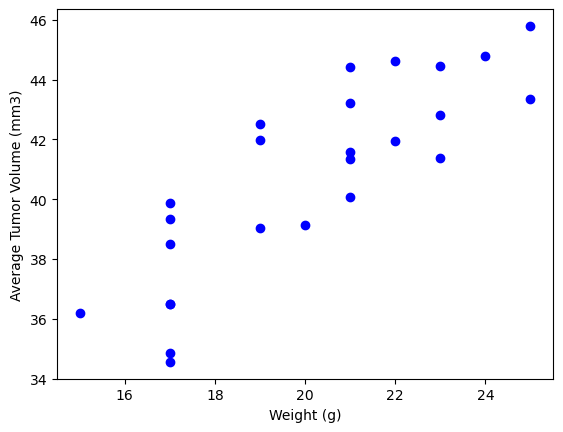

In [194]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
averageCapomulins = capomulins.groupby(["Mouse ID"]).mean()
fig3, ax3 = plt.subplots()
markersize = 5

plt.scatter(averageCapomulins["Weight (g)"], averageCapomulins["Tumor Volume (mm3)"], color = "blue")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

y = 0.95x + 21.55


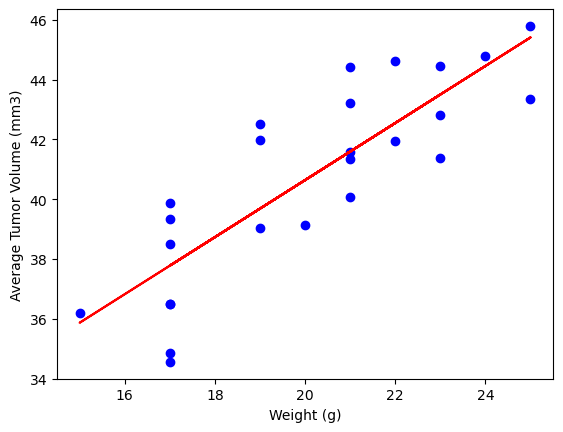

In [197]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = averageCapomulins['Weight (g)']
y = averageCapomulins['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)

fig4, ax4 = plt.subplots()
plt.scatter(x,y, color="blue")
plt.plot(x,regress,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()